# Segmentation Of Tumors From Medical Resonance Imaging Scans With Transfer Learning

The purpose of this project is to compare different pretrained deep learning models and custom models in segmentation and classification tasks on Medical Resonance Imaging(MRI) scans and identify the model and parameters with highest accuracy, to assist radiologists in analysing MRI modalities by providing confirmation about the diagnosis as well as localising the tumor(s).

In [1]:
#Adding sibling directory to path of current directory
import sys
import os
# Adding Dataset to import path
sibling_dir = "/home/wizard/codestuff/brain-tumor-classification/dataset"
sys.path.insert(1, sibling_dir)

## a) Project Imports
- Dataset
- Plotting Libraries


In [2]:
from torchData import torchData
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## b) Initialisation
We intialize the Training and the Testing dataset as it has been split already.

In [3]:
testData = torchData(sibling_dir+"/Testing")
trainData = torchData(sibling_dir+"/Training")

## Data Visualisation And Exploration

### i) Test Train Split

In [4]:
splitBar = go.Figure(go.Bar(y=["Training", "Testing"],
      x=[len(trainData), len(testData)], orientation="h"))
splitBar.update_layout(title="Dataset Split Visualisation")
splitBar.show()

## ii)Class Distribution
For finding the class distribution we will use a simple counting loop for both the datasets and count the number of occurences of each encoded label.

In [5]:
testCounts = {i: 0 for i in testData.imageLabels}
trainCounts = {i: 0 for i in trainData.imageLabels}
for i in testData.imageLabels:
    testCounts[i]+=1
for i in trainData.imageLabels:
    trainCounts[i]+=1


### 1) For the Testing set

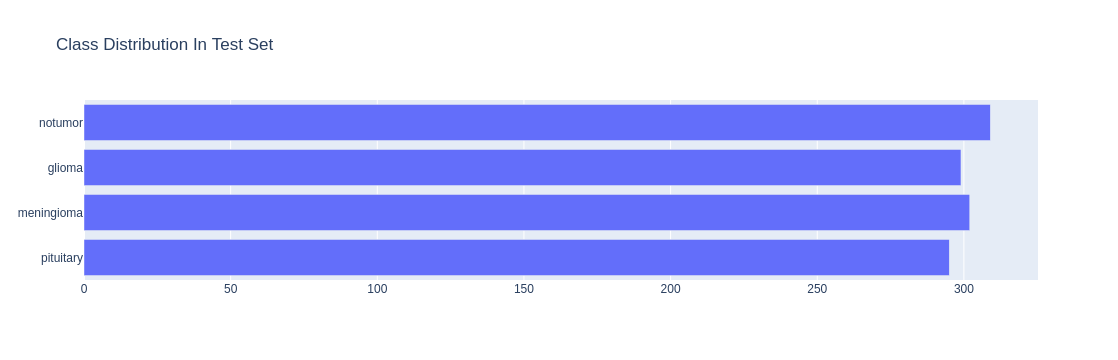

In [6]:
testDist = go.Figure(go.Bar(x=list(testCounts.values()), y=list(testData.classLabels.values()),orientation="h"))
testDist.update_layout(title="Class Distribution In Test Set")

### 2)For The Training set

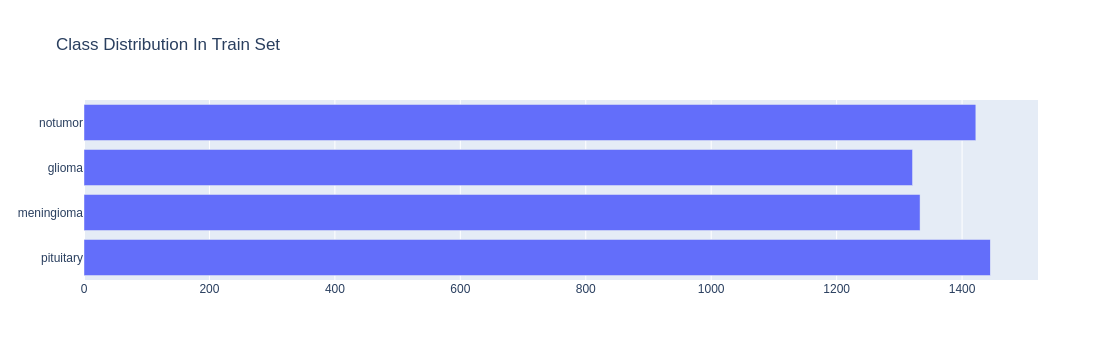

In [7]:
trainDist = go.Figure(go.Bar(x=list(trainCounts.values()), y=list(trainData.classLabels.values()),orientation="h"))
trainDist.update_layout(title="Class Distribution In Train Set")

### iii) Image Visualization

### 1)Testing Set

In [23]:
testImages = [testData[(-1,i)] for i in testData.classLabels.keys()]
testImages

[(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512>, 0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=341x395>, 1),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512>, 2),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225>, 3)]

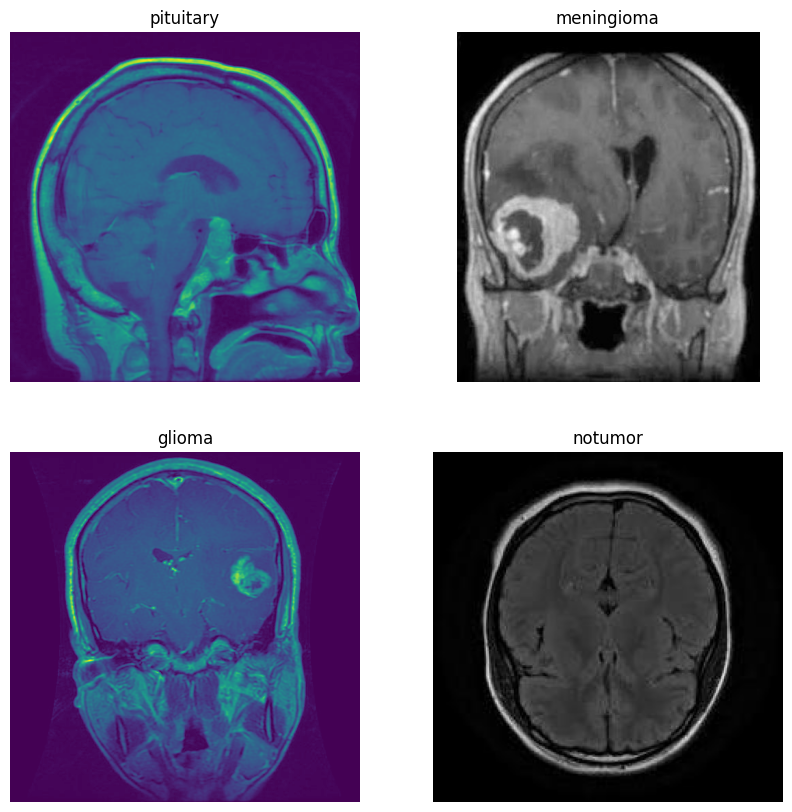

In [41]:
plt.figure(figsize=(10,10))
for i in testImages:
    plt.subplot(2,2, i[1]+1)
    plt.imshow(i[0])
    plt.title(testData.classLabels[i[1]])
    plt.axis('off')

### 3)Training Set

In [31]:
trainImages = [trainData[(-1, i)] for i in trainData.classLabels.keys()]
trainImages

[(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>, 0),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>, 1),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>, 2),
 (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=236x236>, 3)]

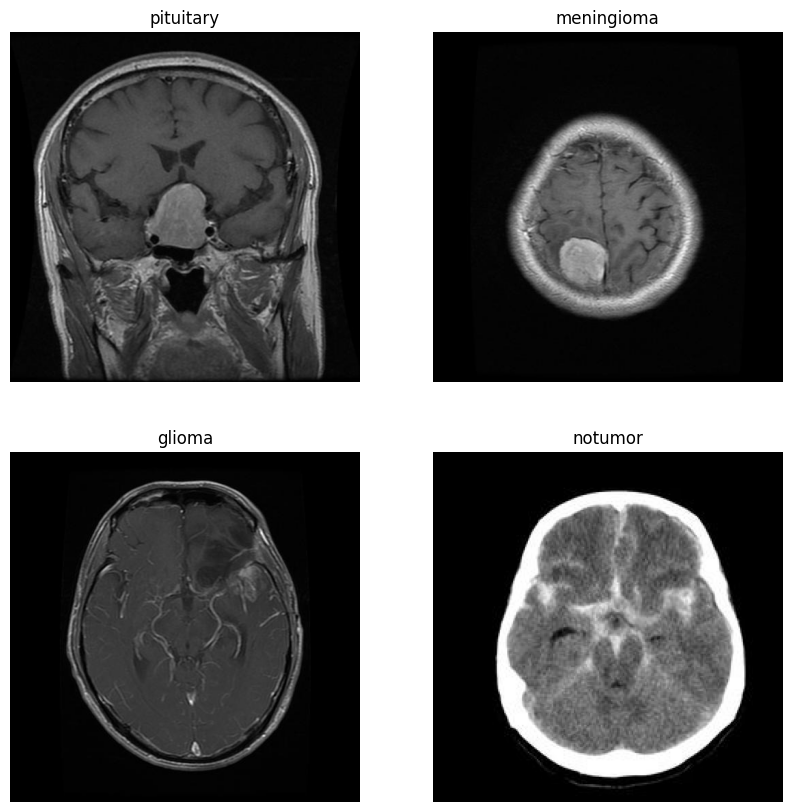

In [43]:
plt.figure(figsize=(10,10))
for i in trainImages:
    plt.subplot(2,2, i[1]+1)
    plt.imshow(i[0])
    plt.title(testData.classLabels[i[1]])
    plt.axis('off')

# Conclusion:

After the exploratory data analysis, we have identified the characteristics of the dataset and confirmed
that noise is minimal in the dataset and the categorical distribution is balanced enough to be utilized
for any further development.
Further preprocessing steps include:
- Standardize image resolutions in the dataset to ensure generalization of the model.
- Convert to grayscale or modify opacity of images to differentiate between brain matter and the tumor.